# Whisper Options

This notebook explores patterns in Whisper options that yield good results in terms of Word Error Rate.

In [1]:
import pandas

df = pandas.read_csv('../docs/output-2024-04-11/report-whisper.csv')
df.head(5)

,run_id,druid,file,language,transcript_filename,transcript_language,runtime,wer,mer,wil,wip,hits,substitutions,insertions,deletions,diff,options
0,bb158br2509-whisper-021,bb158br2509,bb158br2509_sl.m4a,en,bb158br2509_script.txt,en,277.444349,0.055188,0.054538,0.076508,0.923492,4334,102,54,94,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'large', 'beam_size': 5, 'patie..."
1,bb158br2509-whisper-022,bb158br2509,bb158br2509_sl.m4a,en,bb158br2509_script.txt,en,277.511495,0.055188,0.054538,0.076508,0.923492,4334,102,54,94,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'large', 'beam_size': 5, 'patie..."
2,bb158br2509-whisper-037,bb158br2509,bb158br2509_sl.m4a,en,bb158br2509_script.txt,en,277.280526,0.055188,0.054538,0.076508,0.923492,4334,102,54,94,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'large-v3', 'beam_size': 5, 'pa..."
3,bb158br2509-whisper-038,bb158br2509,bb158br2509_sl.m4a,en,bb158br2509_script.txt,en,277.261359,0.055188,0.054538,0.076508,0.923492,4334,102,54,94,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'large-v3', 'beam_size': 5, 'pa..."
4,bb158br2509-whisper-017,bb158br2509,bb158br2509_sl.m4a,en,bb158br2509_script.txt,en,276.907950,0.058499,0.057659,0.079835,0.920165,4331,103,66,96,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'large', 'beam_size': 5, 'patie..."


## Mean Word Error Rate

In [2]:
opts = df.groupby(by=['options']).mean(numeric_only=True).reset_index()
opts = opts.sort_values('wer')
opts[['options', 'wer']].head(5)

,options,wer
9,"{'model_name': 'large', 'beam_size': 5, 'patie...",0.186067
8,"{'model_name': 'large', 'beam_size': 5, 'patie...",0.190634
29,"{'model_name': 'large-v3', 'beam_size': 5, 'pa...",0.192659
4,"{'model_name': 'large', 'beam_size': 10, 'pati...",0.194170
5,"{'model_name': 'large', 'beam_size': 10, 'pati...",0.194170


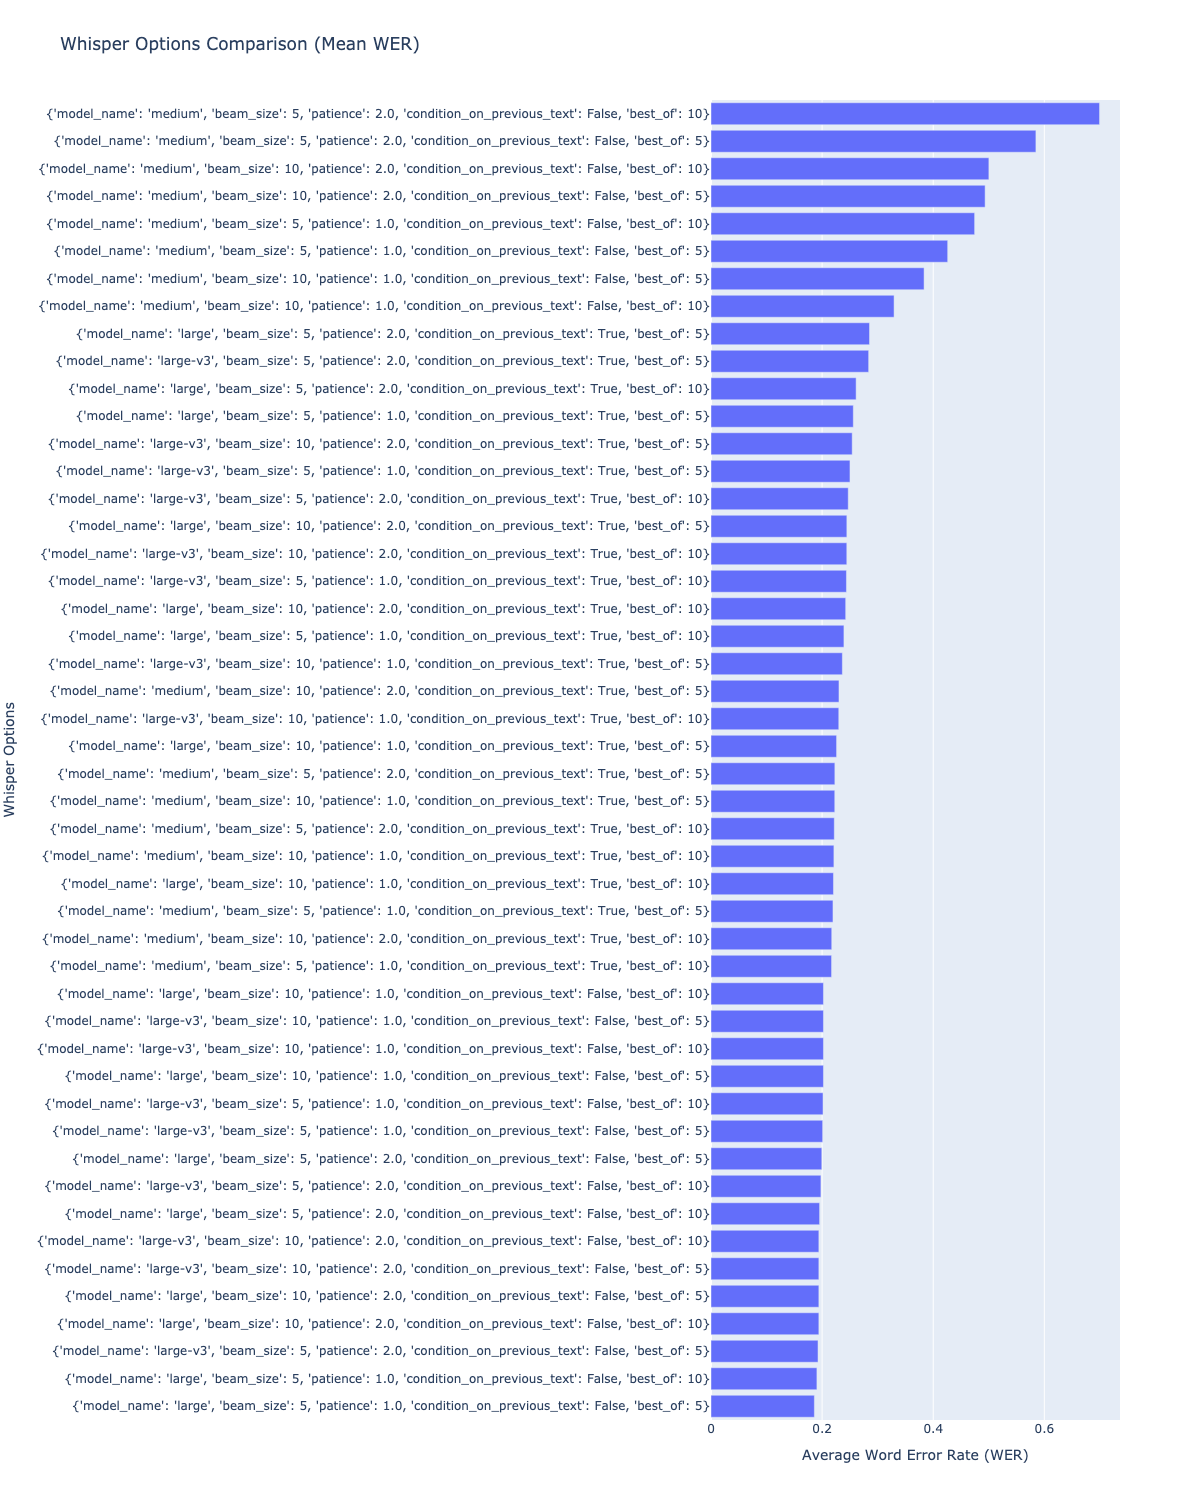

In [3]:
import plotly.express as px

fig = px.bar(
    opts.set_index('options')['wer'],
    height=1500, 
    width=1200, 
    orientation='h',
    title="Whisper Options Comparison (Mean WER)", 
    labels={"value": "Average Word Error Rate (WER)", "options": "Whisper Options"}
)
fig = fig.update(layout_showlegend=False)
fig.show('png')

## Minimum Word Error Rate

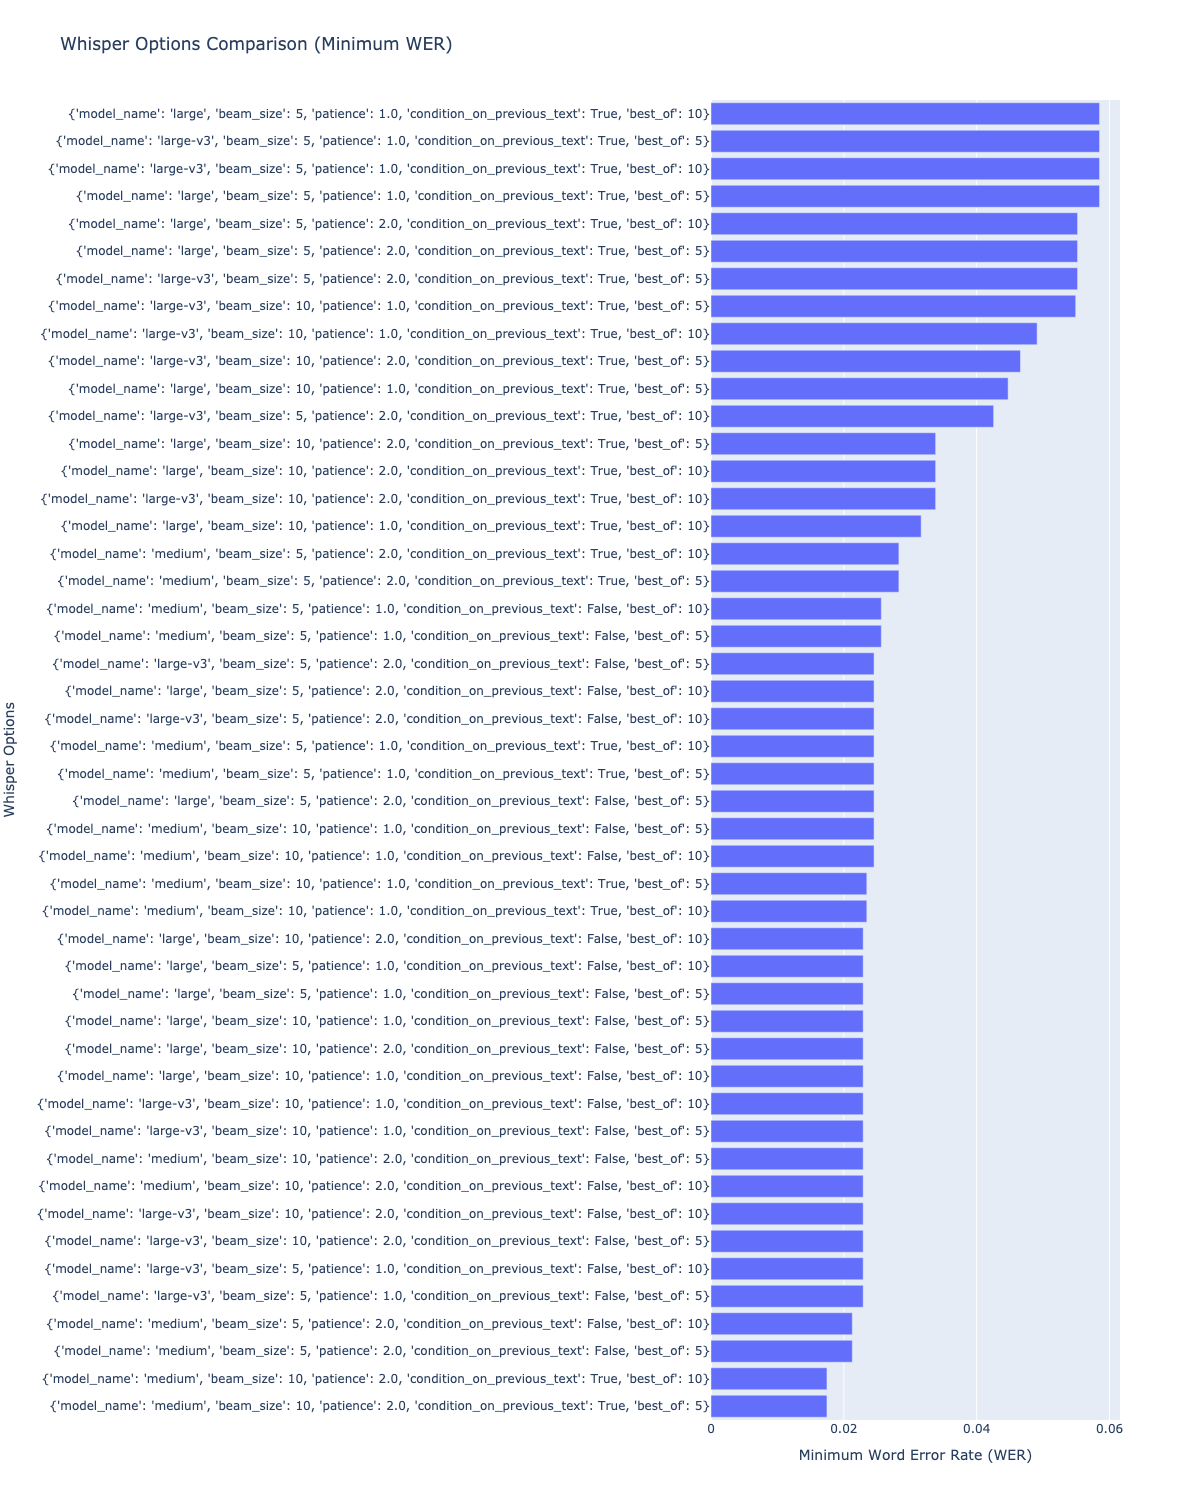

In [4]:
opts = df.groupby(by=['options']).min(numeric_only=True).reset_index()
opts = opts.sort_values('wer')

fig = px.bar(
    opts.set_index('options')['wer'],
    height=1500,
    width=1200,
    orientation='h',
    title="Whisper Options Comparison (Minimum WER)",
    labels={"value": "Minimum Word Error Rate (WER)", "options": "Whisper Options"}
)
fig = fig.update(layout_showlegend=False)
fig.show('png')

## Median Error Rate

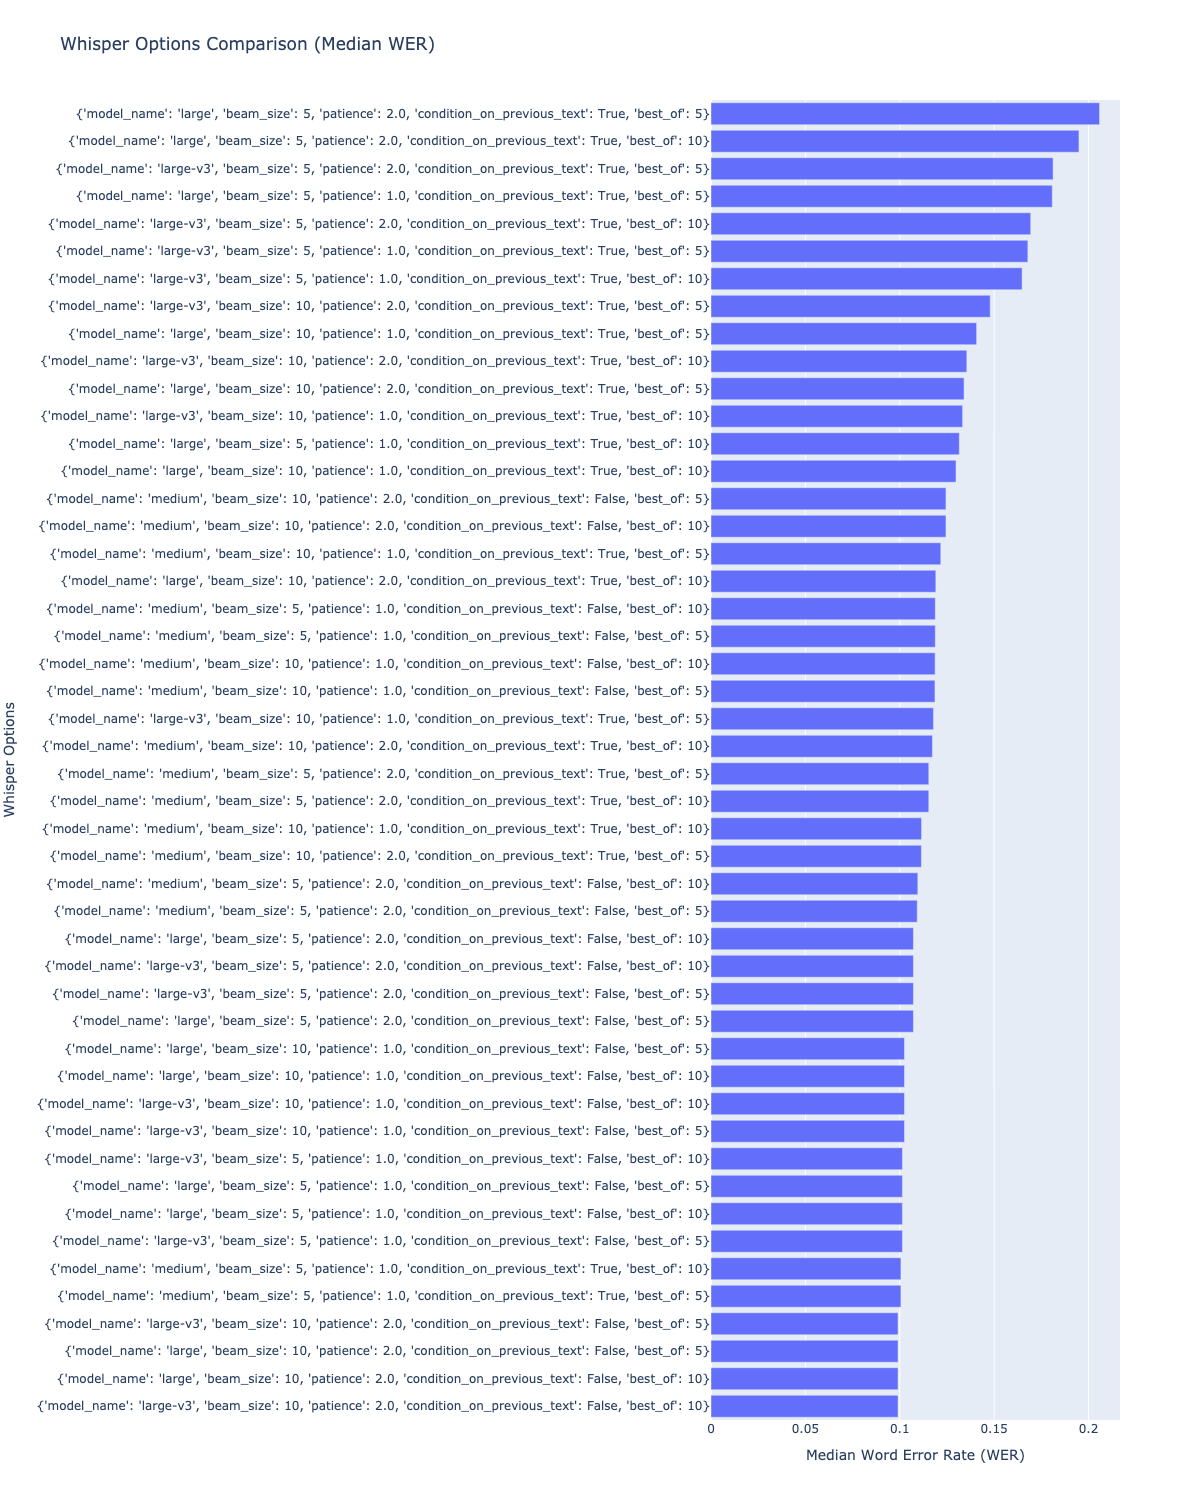

In [5]:
opts = df.groupby(by=['options']).median(numeric_only=True).reset_index()
opts = opts.sort_values('wer')

fig = px.bar(
    opts.set_index('options')['wer'],
    height=1500,
    width=1200,
    orientation='h',
    title="Whisper Options Comparison (Median WER)",
    labels={"value": "Median Word Error Rate (WER)", "options": "Whisper Options"}
)
fig = fig.update(layout_showlegend=False)
fig.show('png')

## Error Rate Standard Deviation

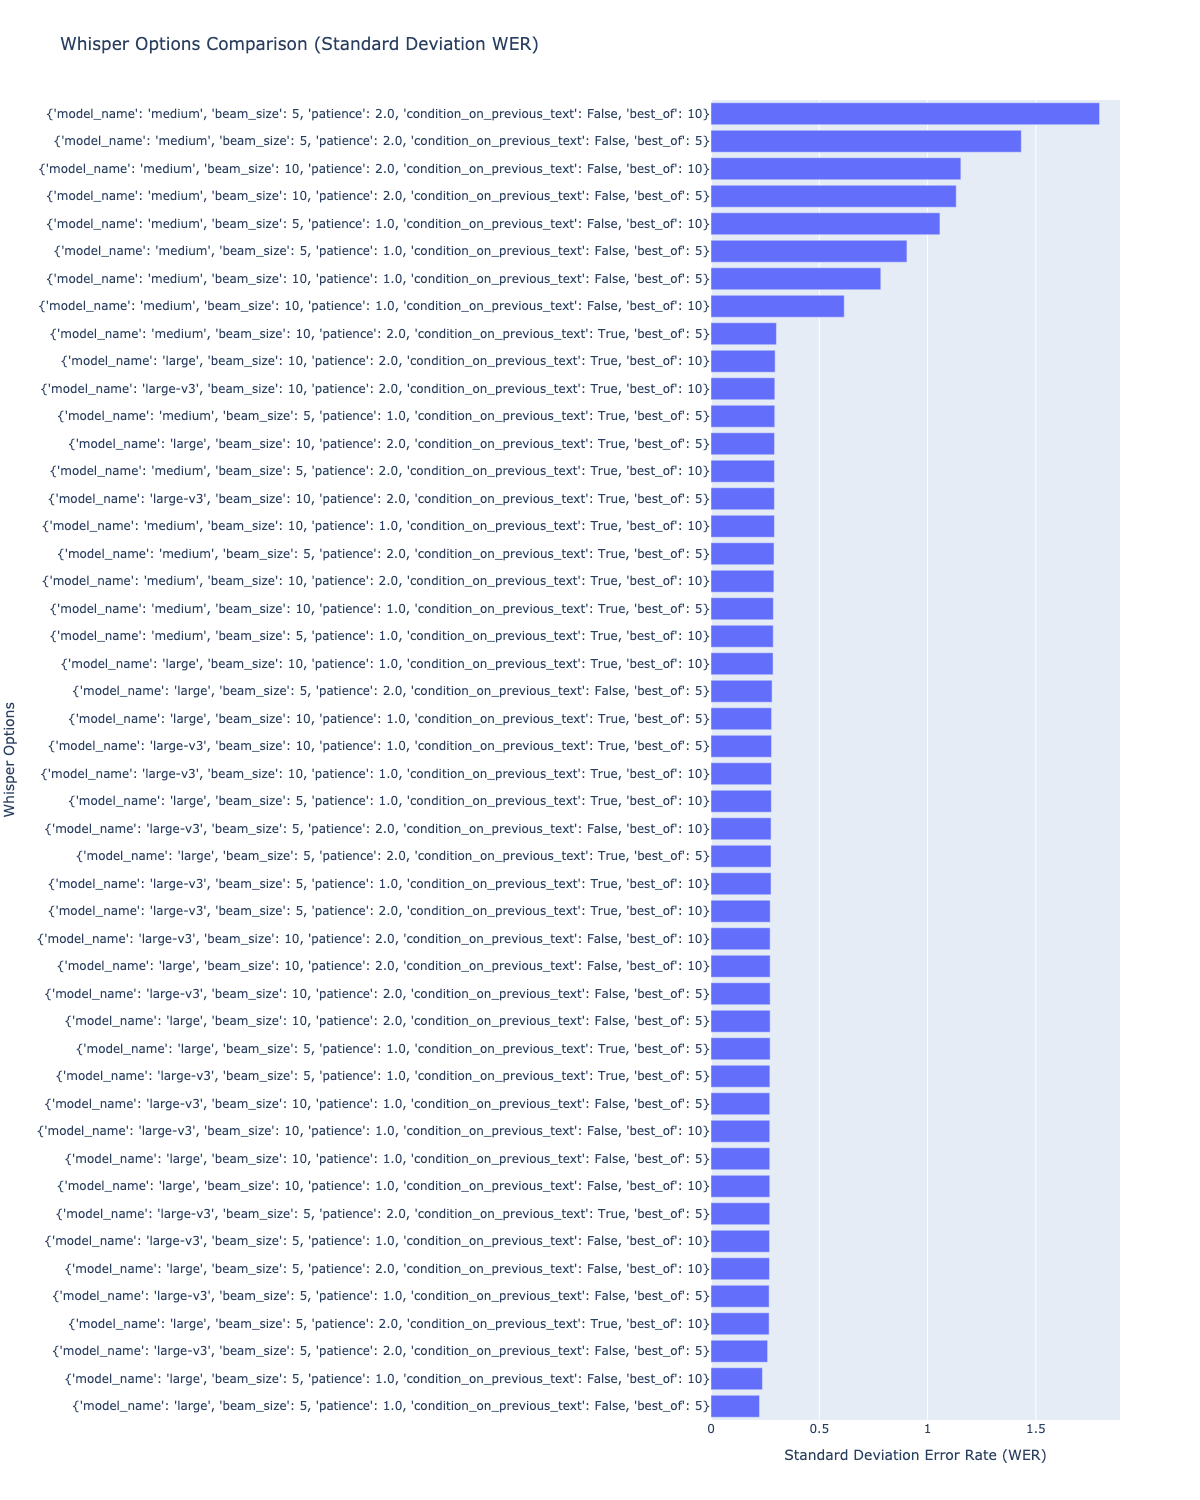

In [6]:
opts = df.groupby(by=['options']).std(numeric_only=True).reset_index()
opts = opts.sort_values('wer')

fig = px.bar(
    opts.set_index('options')['wer'],
    height=1500,
    width=1200,
    orientation='h',
    title="Whisper Options Comparison (Standard Deviation WER)",
    labels={"value": "Standard Deviation Error Rate (WER)", "options": "Whisper Options"}
)
fig = fig.update(layout_showlegend=False)
fig.show('png')

## Mean Runtime

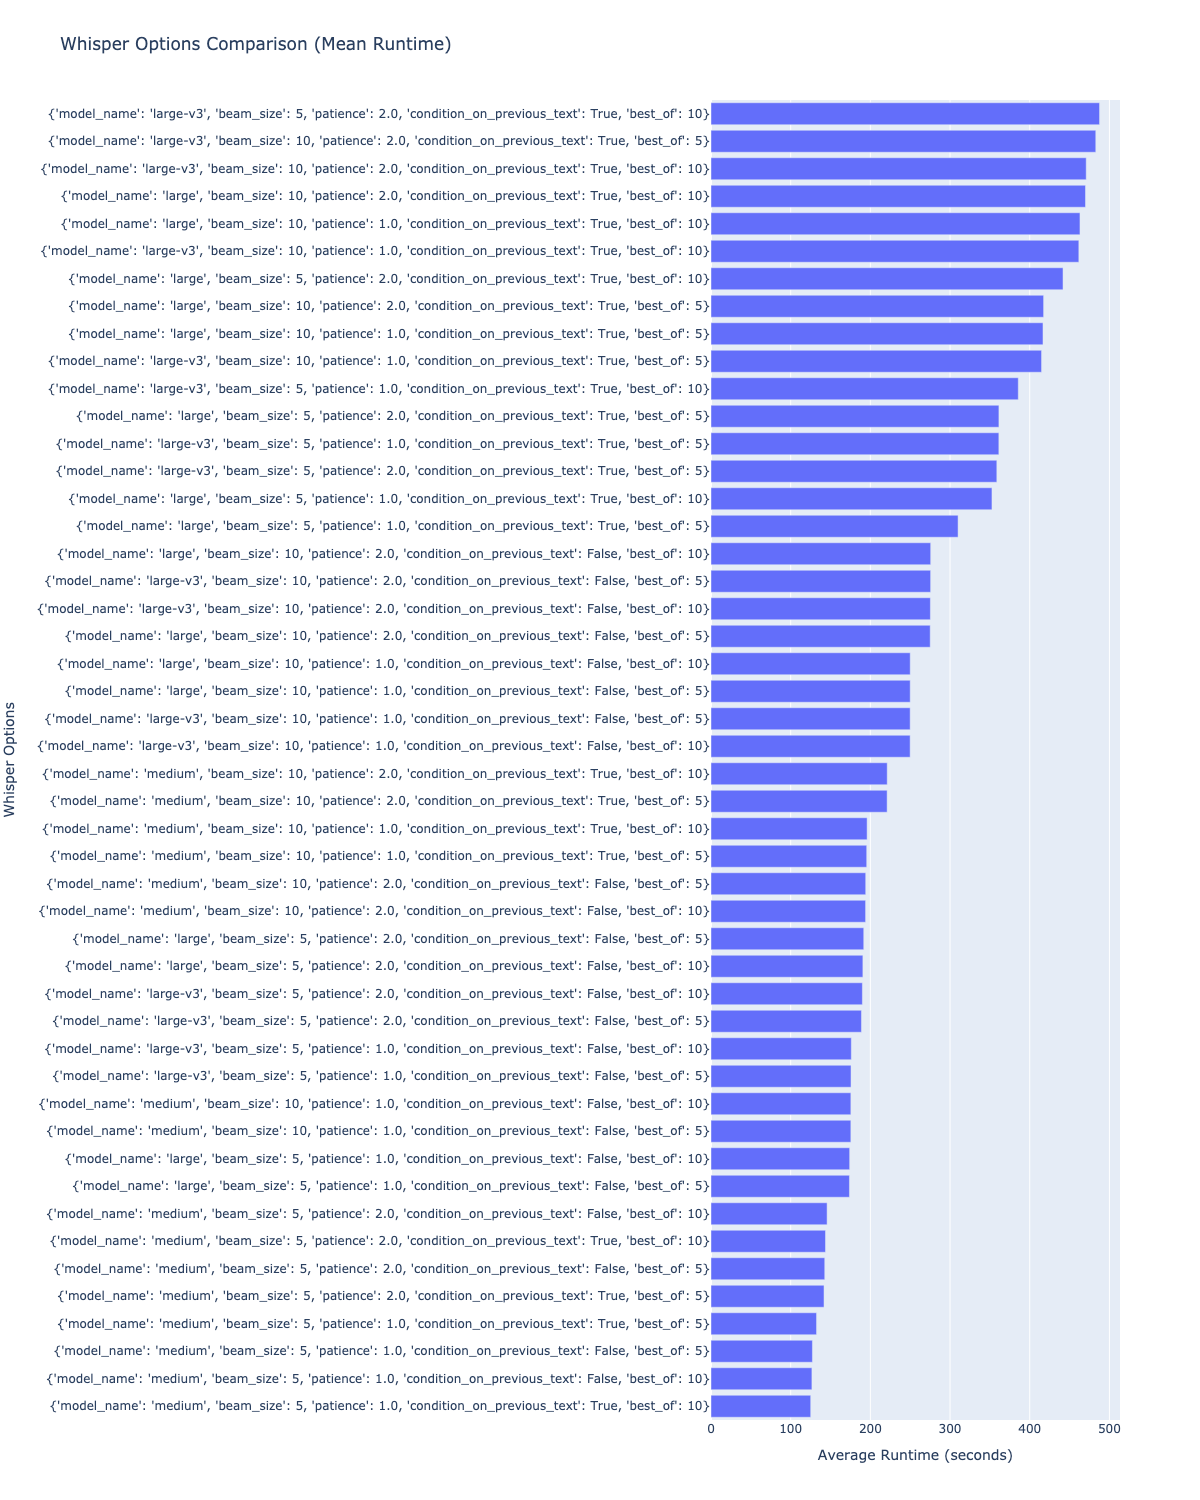

In [7]:
rt = df.groupby(by=['options']).mean(numeric_only=True).reset_index()
rt = rt.sort_values('runtime')

fig = px.bar(
    rt.set_index('options')['runtime'],
    height=1500,
    width=1200,
    orientation='h',
    title="Whisper Options Comparison (Mean Runtime)",
    labels={"value": "Average Runtime (seconds)", "options": "Whisper Options"}
)
fig = fig.update(layout_showlegend=False)
fig.show('png')

## Runtime by Model

To analyze the data by the Whisper model that was used we need to parse the `options` column as a Python dictionary, and then pull it out into its own column.

In [8]:
df = pandas.read_csv('../docs/output-2024-04-11/report-whisper.csv', converters={'options': eval})
df['model_name'] = df.options.apply(lambda d: d['model_name'])

def option_string(d):
    d.pop('model_name')
    return str(d)

df['options'] = df.options.apply(option_string)
df[['model_name', 'options']]


,model_name,options
0,large,"{'beam_size': 5, 'patience': 2.0, 'condition_o..."
1,large,"{'beam_size': 5, 'patience': 2.0, 'condition_o..."
2,large-v3,"{'beam_size': 5, 'patience': 2.0, 'condition_o..."
3,large-v3,"{'beam_size': 5, 'patience': 2.0, 'condition_o..."
4,large,"{'beam_size': 5, 'patience': 1.0, 'condition_o..."
...,...,...
475,large-v3,"{'beam_size': 5, 'patience': 2.0, 'condition_o..."
476,large-v3,"{'beam_size': 5, 'patience': 1.0, 'condition_o..."
477,large,"{'beam_size': 5, 'patience': 2.0, 'condition_o..."
478,large,"{'beam_size': 5, 'patience': 1.0, 'condition_o..."


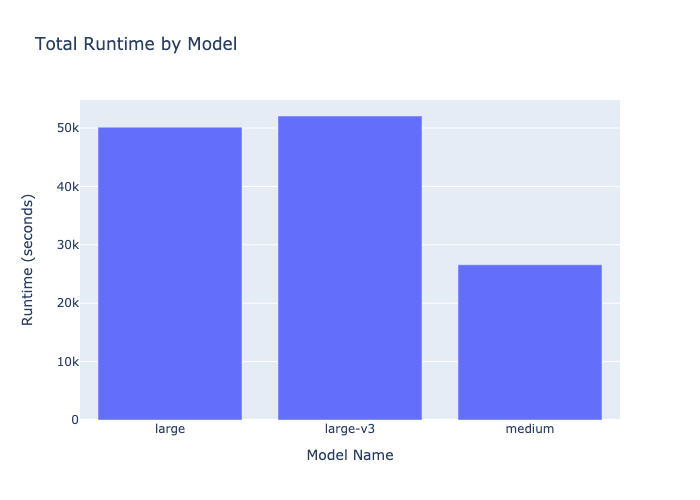

In [9]:
model_stats = df.groupby('model_name').sum('runtime')
fig = px.bar(model_stats['runtime'], labels={'value': 'Runtime (seconds)', 'model_name': 'Model Name'}, title='Total Runtime by Model')
fig = fig.update(layout_showlegend=False)
fig.show('png')

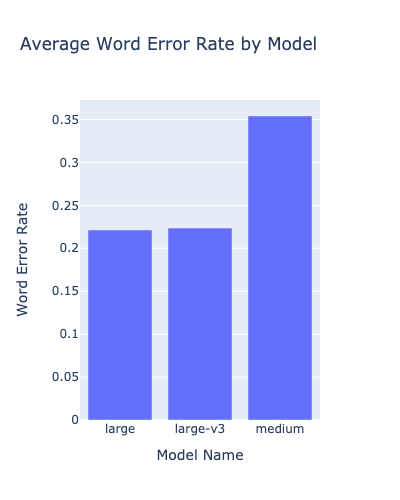

In [10]:
model_stats = df.groupby('model_name').mean('wer')
fig = px.bar(model_stats['wer'], labels={'value': 'Word Error Rate', 'model_name': 'Model Name'}, title='Average Word Error Rate by Model', width=400)
fig = fig.update(layout_showlegend=False)
fig.show('png')

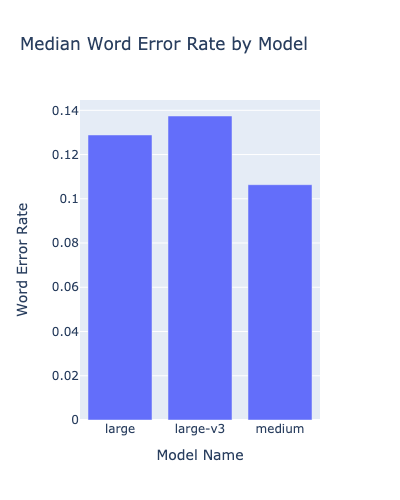

In [11]:
model_stats = df.groupby('model_name').median('wer')
fig = px.bar(model_stats['wer'], labels={'value': 'Word Error Rate', 'model_name': 'Model Name'}, title='Median Word Error Rate by Model', width=400)
fig = fig.update(layout_showlegend=False)
fig.show('png')

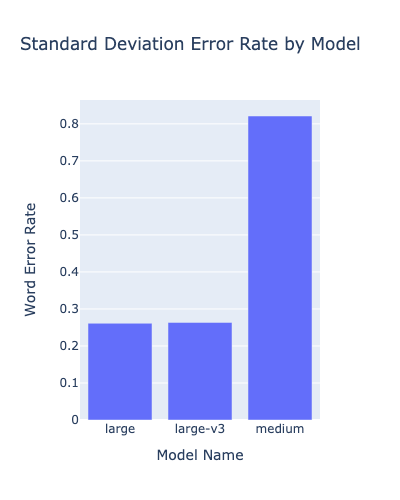

In [12]:
model_stats = df.groupby('model_name').std(numeric_only=True)
fig = px.bar(model_stats['wer'], labels={'value': 'Word Error Rate', 'model_name': 'Model Name'}, title='Standard Deviation Error Rate by Model', width=400)
fig = fig.update(layout_showlegend=False)
fig.show('png')

In [13]:
model_stats = df.groupby(['model_name', 'options']).mean(numeric_only=True)

medium = model_stats.loc[('medium')].sort_values('runtime')
large = model_stats.loc[('large')].sort_values('runtime')
large_v3 = model_stats.loc[('large-v3')].sort_values('runtime')


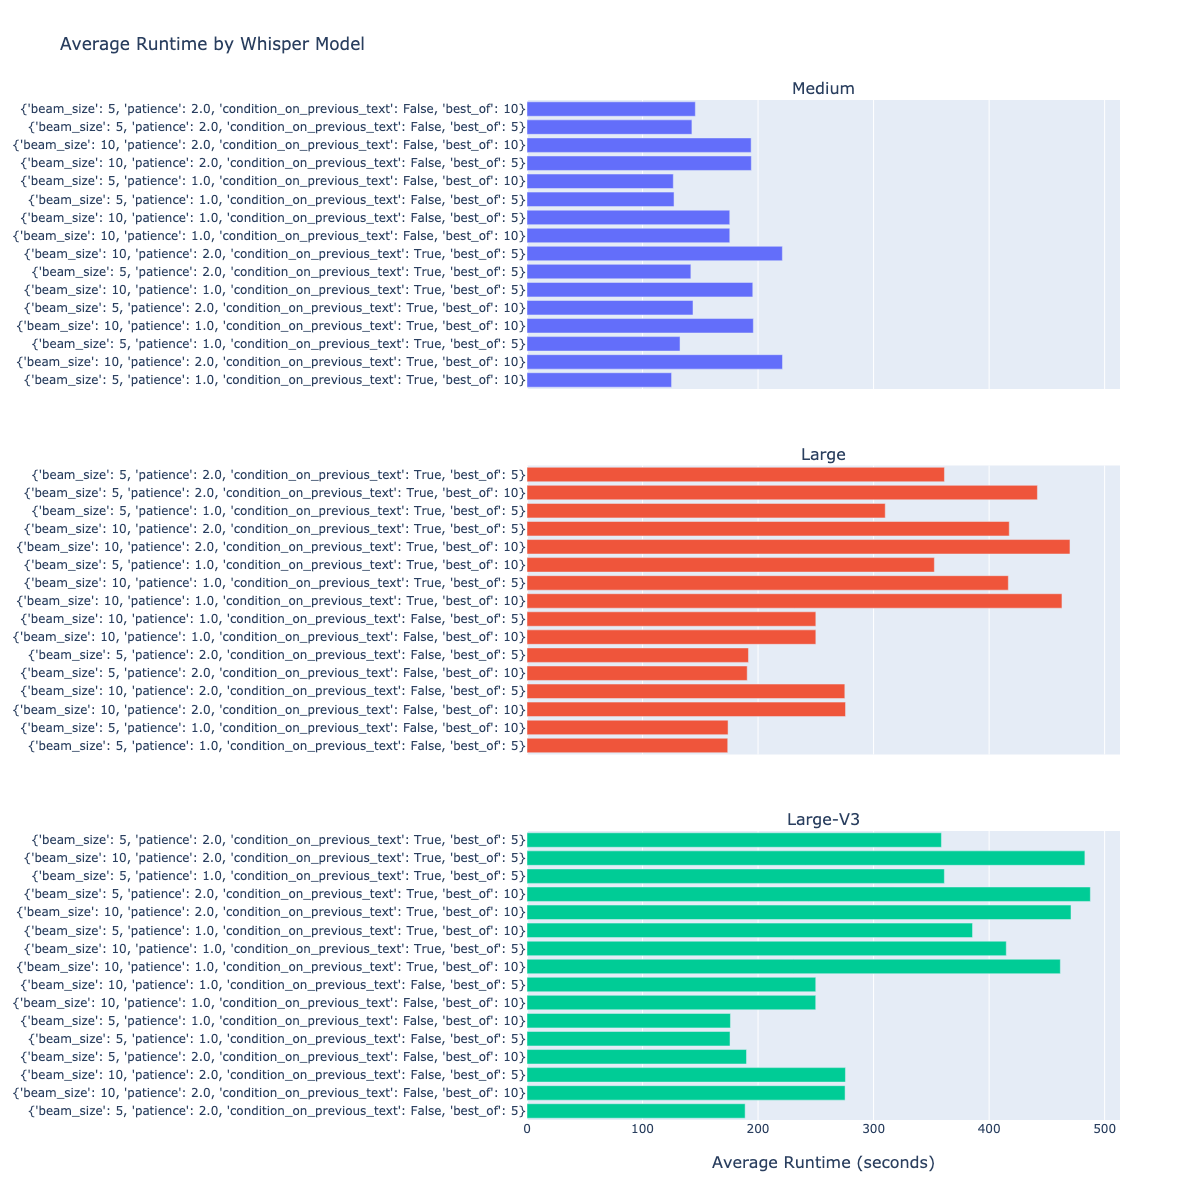

In [21]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

b1 = go.Bar(y=medium.index, x=medium['runtime'], orientation='h')
b2 = go.Bar(y=large.index, x=large['runtime'], orientation='h')
b3 = go.Bar(y=large_v3.index, x=large_v3['runtime'], orientation='h')

fig = make_subplots(
    rows=3, 
    cols=1, 
    shared_xaxes=True, 
    subplot_titles=['Medium', 'Large', 'Large-V3'],
    x_title='Average Runtime (seconds)',
    vertical_spacing=.075
)

fig.append_trace(b1, 1, 1)
fig.append_trace(b2, 2, 1)
fig.append_trace(b3, 3, 1)

fig.update_layout(
    width=1200,
    height=1200,
    title_text='Average Runtime by Whisper Model',
    showlegend=False,
)

fig.show('png')

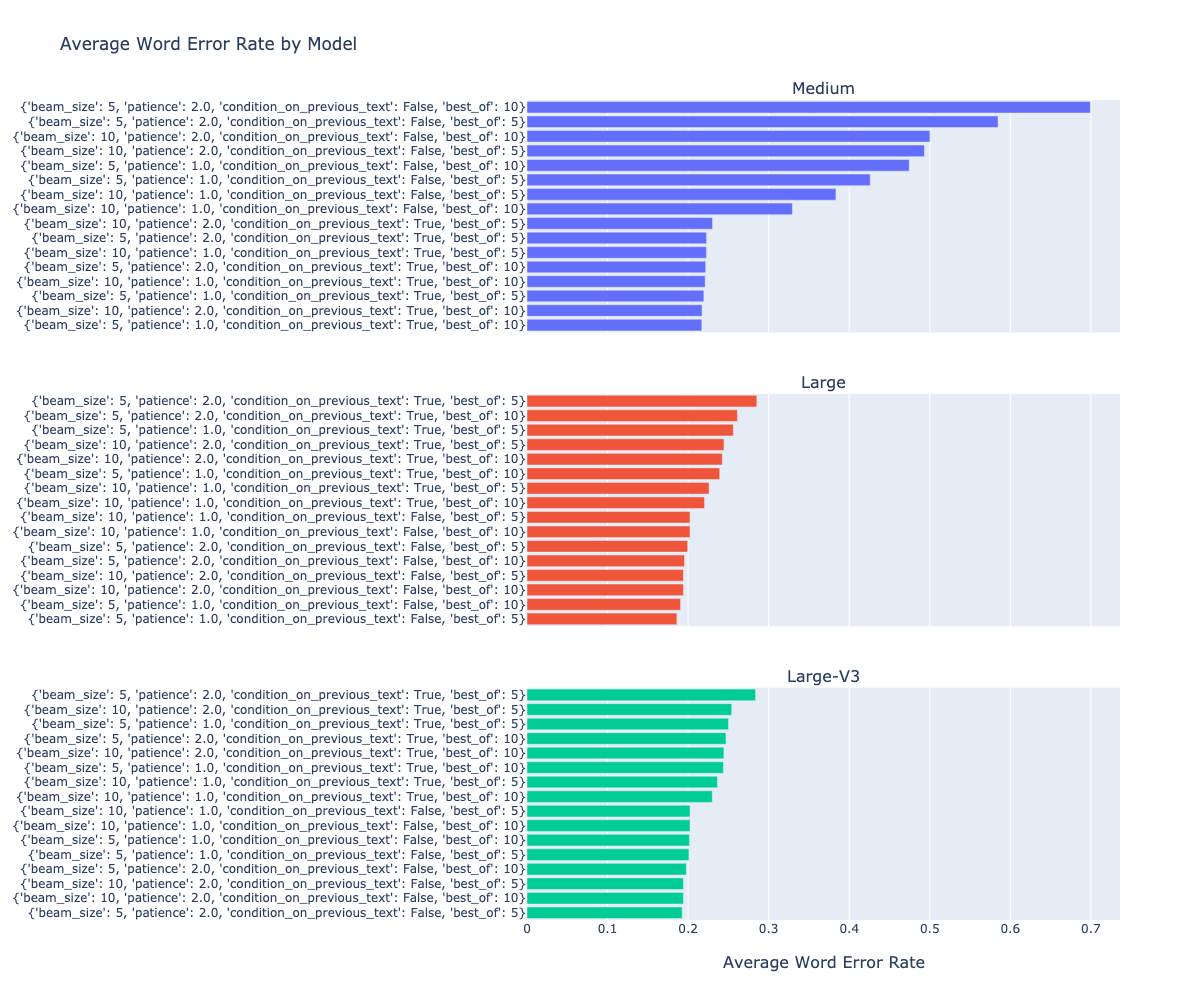

In [20]:
model_stats = df.groupby(['model_name', 'options']).mean(numeric_only=True)

medium = model_stats.loc[('medium')].sort_values('wer')
large = model_stats.loc[('large')].sort_values('wer')
large_v3 = model_stats.loc[('large-v3')].sort_values('wer')

b1 = go.Bar(y=medium.index, x=medium['wer'], orientation='h')
b2 = go.Bar(y=large.index, x=large['wer'], orientation='h')
b3 = go.Bar(y=large_v3.index, x=large_v3['wer'], orientation='h')

fig = make_subplots(
    rows=3, 
    cols=1, 
    shared_xaxes=True, 
    subplot_titles=['Medium', 'Large', 'Large-V3'],
    x_title='Average Word Error Rate',
    vertical_spacing=.075
)

fig.append_trace(b1, 1, 1)
fig.append_trace(b2, 2, 1)
fig.append_trace(b3, 3, 1)

fig.update_layout(
    width=1200,
    height=1000,
    title_text='Average Word Error Rate by Model',
    showlegend=False,
)

fig.show('png')